# **11. DFS/BFS**


---

**탐색(Search)**란 많은 양의 데이터 중 원하는 데이터를 찾는 과정을 의미한다.

주로 그래프, 트리와 같은 자료구조 안에서 탐색하는 문제가 나오는데, 이 때 쓰이는 대표적인 탐색 알고리즘 중 하나가 DFS/BFS다.

이걸 배우려면 일단 스택, 큐, 재귀함수에 대해 알아야 하기 때문에, 먼저 얘네들 부터 다시 빠르게 복습해보자.

## **🍕 Stack, Queue**
스택과 큐는 공통적인 핵심 기능들인 **삽입(Push)**, **삭제(Pop)**으로 구성된다.

실제로 스택과 큐를 사용할 때, **언더플로우**(Underflow, 안에 아무것도 없는데 또 가져가려고 한다 아이고)와 **오버플로우**(Overflow, 더 이상 못 먹는데 계속 먹이려 한다 아이고)도 고려해 봐야 한다.

<br><br>

### **🍦 Stack**
박스 쌓기에 비유할 수 있다.
즉, **일찍온 놈이 늦게 나간다.** 이걸 **LIFO(Last In First Out)**, 또는 **FILO(First in Last Out)**이라고 한다.    
DFS, Back tracking에 효과적.   
후입선출 개념 자체가 재귀함수랑 일맥상통함

파이썬에서 스택 사용시에는 별도의 라이브러리를 사용 안 해도 된다.
기본 **리스트**에서 <mark>**append()**</mark>와 <mark>**pop()**</mark>메서드를 이용하면 스택 자료구조와 동일하게 작용한다.

### **🍦 Queue**
놀이공원 줄서기로 비유할 수 있다. 즉, **먼저 온 놈이 임자다.** 이걸 **선입선출(FIFO, First In First Out)**구조라고 한다.   
BFS에 효과적.

### **🍦 Priority Queue**
우선순위가 높은 애가 순서 상관 없이 맨 앞(front)에 위치.   
일반적으로 heap으로 구현한다.

In [ ]:
from collections import deque

queue = deque()

queue.append(5) #[5]
queue.append(2) #[5, 2]
queue.append(3) #[5, 2, 3]
queue.append(7) #[5, 2, 3 ,7]
queue.popleft() #[2, 3, 7], FIFO
queue.append(1) #[2, 3, 7, 1]
queue.append(4) #[2, 3, 7, 1, 4]
queue.pop() #[2, 3, 7, 1], 오른쪽 끝 pop. deque는 양 쪽에서 pop이 가능하다

print(queue)
print(list(queue))

deque([2, 3, 7, 1])
[2, 3, 7, 1]


파이썬에서 queue를 구현할 때는 **collections의 deque**를 쓰면 좋다.

deque는 **스택과 큐의 장점을 모두 채택한 구조**로, **데이터를 넣고 빼는 속도가 리스트보다 효율적**이고, **queue라이브러리 이용하는 것 보다 더 간단**하다.

depue 객체를 리스트로 쓰고싶다면 **list()**로 감싸주자



### **🍦 Recusrive function**
자기 자신을 다시 호출하는 함수.

대표적으로 팩토리얼(factorial), 유클리드 호제법, 피보나치 수열 등이 있다.

In [ ]:
def recursive(i):
    if i == 5:
        return
    print(f"{i}에서 {i+1} 호출")
    recursive(i+1)
    print(f"{i}에서 종료")

recursive(1)

1에서 2 호출
2에서 3 호출
3에서 4 호출
4에서 5 호출
4에서 종료
3에서 종료
2에서 종료
1에서 종료


재귀함수의 수행에는 **스택 자료구조**가 사용된다.
함수를 계속 호출했을 때, **가장 마지막에 호출된 함수가 먼저 끝나야 그 앞에 호출된 함수가 종료될 수 있기 때문이다**.(LIFO)

다시 말하면, **재귀 함수는 내부적으로 스택 자료구조와 구조가 동일하다!**

In [ ]:
# 팩토리얼 재귀

def factorial(n):
    if n<= 1:
        return 1
    return n*factorial(n-1)

print("팩토리얼: ", factorial(5))

#유클리드 호제법
#A,B의 최대 공약수는
#B(=>A)와 A%B(=>B)의 최대공약수를 A%B가 0일때까지 계속 구해 얻어진 B와 같다.

def gcd_reculsive(a, b):
    if a%b == 0:
        return b
    return gcd_reculsive(b, a%b)

print("유클리드: ", gcd_reculsive(192, 162))

# 피보나치
def fibo(n):
    if(n==1 or n==2):
        return 1
    return fibo(n-1)+fibo(n-2)

print("피보나치: ", fibo(10))

팩토리얼:  120
유클리드:  6
피보나치:  55


In [ ]:
#백준 2075번 -  N번째 큰 수
#자료구조 문제

#첫째 줄에 N(1 ≤ N ≤ 1,500)이 주어진다. 다음 N개의 줄에는 각 줄마다 N개의 수가 주어진다.
#표에 적힌 수는 -10억보다 크거나 같고, 10억보다 작거나 같은 정수이다.
#첫째 줄에 N번째 큰 수를 출력한다.

#열심히 리스트로 짰는데.. 결국 되지 않았다..
#내가 짰던 걸 heap을 써서 코드로 옮기면 되는데.. 머리가 안 돌아가 버림..
#Jahni's Blog 자흐니님 코드 참고
#저 분 천재신가봐..
import sys
import heapq


n = int(input())
heap=[]

for _ in range(n):
   list_ = map(int,input().split())
   for item in list_:
        if(len(heap)<n): # 무조건 heap이 n이 되도록.. 어떻게 그런 생각을..
           heapq.heappush(heap, item)
        elif(heap[0]<item):
            heapq.heappop(heap) #가장 작은 수보다 들어오는 아이템이 크면 교체
            heapq.heappush(heap, item)

print(heap[0]) #제일 작은 수가 인덱스 0번에 온다...


In [ ]:
#백준 9012 - 괄호
#스택 문제

from collections import deque

n = int(input())
list_=[]
stack= deque()
for i in range(n):
    list_.append(input())

for item in list_:
    stack.clear()
    for j in range(0, len(item)):
        stack.append(item[j])
        if item[j]==")" and len(stack)>1 and stack[-2]=="(":
            stack.pop()
            stack.pop()
    if (len(stack)==0):
        print("YES")
    else:
        print("NO")


3
((
))
())(()
NO
NO
NO


## **DFS(Depth-First-Search)**

깊이 우선 탐색. 그래프에서 **깊은 곳**을 우선적으로 탐색하는 알고리즘이다.   
DFS는 Stack 구조에 기초하기 때문에, 구현이 간단하다.

❓ **그래프(Graph)는 뭔가요**  
-------  
그래프는 노드(Node)와 간선(Edge)로 표현되며, 이 때 노드를 정점(Vertex)라고도 한다.    
<br>

#### **🍰 그래프 탐색**   

하나의 노드에서부터 엣지로 이어진 다른 노드들을 돌아다니는 것을 말한다. 두 노드가 엣지로 직접 연결되어 있다면, 이를 두 노드가 인접하다(Adjacent)라고 말한다.

여기서 소개되는 두 가지의 그래프 표현 방식은 코테에서 필요한 개념이니 머리에 잘 저장해야 한다.   
<br>

>1. 인접 행렬(Adjacency Matrix)
>2. 인접 리스트(Adjacency List)

<br>

#### **🍰 1. 인접 행렬**    

그래프의 연결 관계를 행렬로 표햔하여, 이차원 배열로 나타내는 방식.
- a[i][j]: 노드 i에서 j로 가는 간선이 존재할 경우 1, 아니면 0(가중치 없는 무향 그래프)   
<br>

만약, 방향이 없는 무향 그래프일 경우, A노드에서 B노드로 갈 수 있다면, B노드에서 A노드로도 갈 수 있다. 이 특성으로 인해 대각선을 기준으로 대칭을 이루는 대칭행렬이 나오게 된다.

가중치가 있는 그래프의 그래프의 경우 연결이 되어 있지 않은 노드간의 가중치는 무한의 비용을 부과하며, 이는 코드에서 엄청나게 큰 값을 지정하는 식으로 표현한다.

In [ ]:
# 가중치가 있는 노드 그래프의 인접 행렬

#무한 비용 선언
INF=999999999

graph = [
    [0, 7, 5], #자기 자신은 0, 다른 노드들은 간선의 가중치를 적음.
    [7, 0, INF],
    [5, INF, 0]
]

print(graph)

[[0, 7, 5], [7, 0, 999999999], [5, 999999999, 0]]


위의 그래프를 그리면 다음과 같다.   
<br>
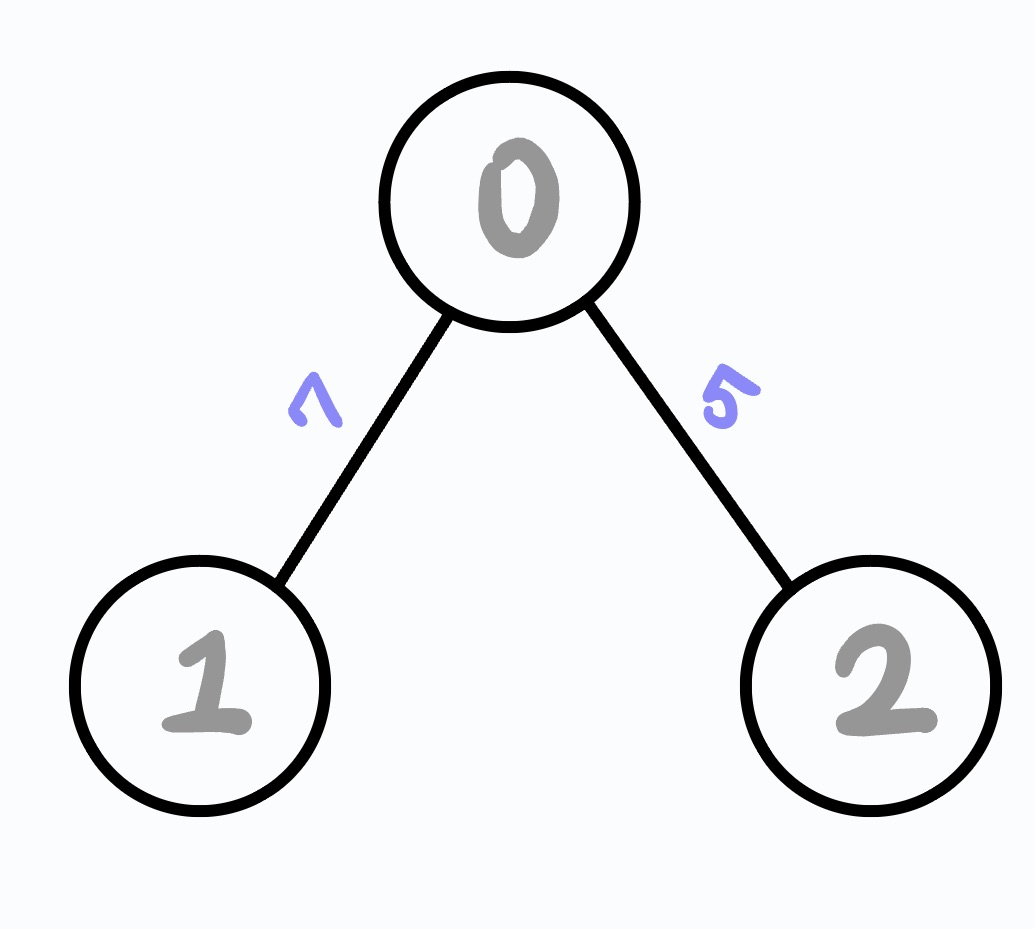

#### **🍰 2. 인접 리스트**    

모든 노드에 대해, 각 노드에 연결된 다른 노드들의 정보를 차례대로 하나씩 연결하여 저장하는 방식.   
인접리스트는 연결 리스트를 이용해 구현하는데, 파이썬은 기본 자료형인 리스트 자료형이 append()와 각종 메서드를 제공하므로, 걱정마십시오.   

파이썬으로 인접 리스트를 이용해 그래프를 표현할 때, 단순히 2차원 리스트를 이용하면 된다.

In [ ]:
#가중치가 있는 그래프의 인접 리스트

#노드가 3개이므로, 행이 3개인 2차원 리스트로 인접 리스트 표현
graph = [[] for _ in range(3)]

#노드 0에 연결된 노드 정보 저장
#[연결된 노드, 가중치]
graph[0].append((1, 7))
graph[0].append((2, 5))

#노드 1에 연결된 노드들 정보 저장
graph[1].append((0, 7))

#노드 2에 연결된 노드들 정보 저장
graph[2].append((0, 5))

print(graph)

[[(1, 7), (2, 5)], [(0, 7)], [(0, 5)]]


#### **🍰 인접 행렬 vs 인접 리스트**

- 메모리 측면
    - 인접 행렬:   
        모든 관계를 저장하므로, 노드 개수가 많을 수록 불필요한 메모리가 소요됨.
    - 인접 리스트:   
        연결된 정보만을 저장하기 때문에, 메모리를 효율적으로 사용할 수 있다.

- 속도 측면
    - 인접 행렬:    
        모든 경우의 수가 제시되어 있으므로, 인접리스트보다 빠르다.
    - 인접 리스트:   
        인접행렬 방식에 비해, 정보를 얻는 속도가 느리다.   
        연결된 데이터를 하나씩 확인해야 하기 때문이다.

## **🍕 DFS의 동작 과정**
1. 탐색 시작 노드를 스택에 넣고, 방문 처리를 한다.   
2. 스택의 최상단 노드에 방문하지 않은 인접 노드가 있으면, 해당 인접 노드를 스택에 넣고 방문 처리 한다. 방문 안 한 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다
    - 방문처리(Visited)란 스택에 한 번 삽입되어 처리된 노드가 다시 삽입되지 않게 체크하는 것을 의미한다. 방문처리를 통해 각 노드를 한 번씩만 처리할 수 있다.
3. 2번의 과정을 더 이상 수행할 수 없을 때 까지 반복한다.


깊이 우선 탐색 알고리즘(DFS)는 스택 자료구조에 기초한다는 점에서 구현이 간단하다.
탐색을 수행할 때, 데이터의 갯수가 N이면 시간 복잡도는 O(N)이다.

실제로 스택을 쓰지 않고, 재귀 함수를 이용했을 때 매우 간결하게 구현할 수 있다.   
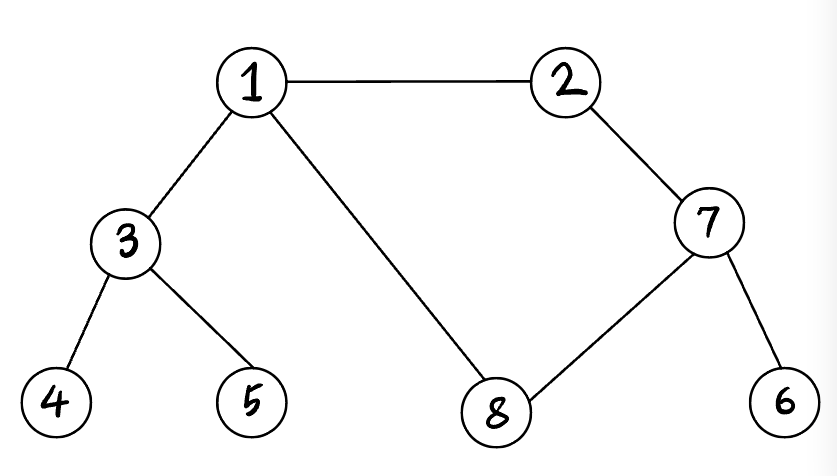
위와 같은 그래프가 있다고 할 때, DFS로 값을 출력하면 순서는 아래와 같다.   

1 → 2 → 7 → 6 → 8 → 3 → 4 → 5

한 번 스택 쓰지 않고 DFS를 해 보아요

In [ ]:
#스택을 쓰지 않은 깊이 탐색
#가중치가 없는 그래프
#재귀로 나타낼 수 있다
def dfs(graph, v, flag):
    flag[v] = True
    print(v, end=" ")
    for i in graph[v]:
        if(not flag[i]):
            dfs(graph, i, flag)


graph = [
    [], #노드 1 자기 자신
    [2, 3, 8], #노드 1의 인접 노드
    [1, 7],    #노드 2의 인접 노드
    [1, 4, 5], #노드 3의 인접 노드
    [3],       #노드 4의 인접 노드
    [3],       #노드 5의 인접 노드
    [7],       #노드 6의 인접 노드
    [2, 6, 8], #노드 7의 인접 노드
    [1, 7]
]

flag = [False]*9

dfs(graph, 1, flag)


1 2 7 6 8 3 4 5 

# **BFS(Breadth-first search)**
너비 우선 탐색. 가까운 노드부터 탐색하는 알고리즘.   

## **🍕 DFS vs BFS**
- DFS: 최대한 **멀리있는** 노드를 우선으로 탐색 **(Stack)**
- BFS: 최대한 **가까이 있는** 노드를 우선으로 탐색 **(Queue)**

## **🍕 BFS 동작 방식**
1. 탐색 시작 노드를 큐에 삽입하고 방문 처리
2. 큐에서 노드를 꺼내고, 해당 노드의 인접 노드 중 방문 안 한 노드를 모두 큐에 넣고 방문 처리
3. 2번의 과정을 더 이상 수행할 수 없을 때 까지 반복

BFS는 큐에 기초하기 때문에, DFS처럼 구현이 간단하다.   
탐색 수행에 걸리는 시간 복잡도는, 데이터 개수가 N개인 경우 O(N)이다.    
앞서 예로 든 전형적인 그래프 형태(1차원 배열) 말고도, 2차원 배열에서도 그래프 형태로 생각하면 수월하게 문제를 풀 수 있다!!    

코딩테스트 중 2차원 배열 탐색 문제를 만나면, 그래프 형태로 바꿔서 생각하는 연습을 하도록 하자!   

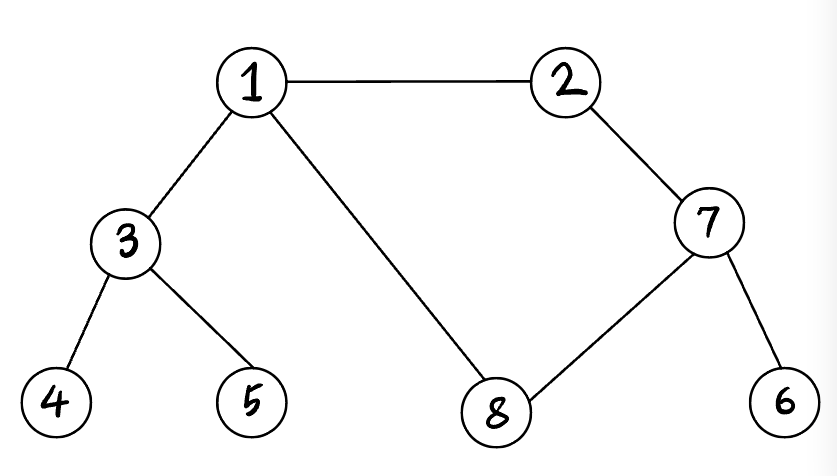

위의 예제를 다시 한 번 보고, 이번에는 BFS로 탐색을 해보자!

BFS 탐색 시 순서는 아래와 같다.   
1 → 2 → 3 → 8 → 7 → 4 → 5 → 6

In [ ]:
from collections import deque

def bfs(graph, start, flag):
    queue = deque([start])
    flag[start] = True
    while queue:
        v = queue.popleft()
        print(v, end= " ")
        for item in graph[v]:
            if(flag[item] == False):
                queue.append(item)
                flag[item]= True

graph = [
    [], #노드 1 자기 자신
    [2, 3, 8], #노드 1의 인접 노드
    [1, 7],    #노드 2의 인접 노드
    [1, 4, 5], #노드 3의 인접 노드
    [3],       #노드 4의 인접 노드
    [3],       #노드 5의 인접 노드
    [7],       #노드 6의 인접 노드
    [2, 6, 8], #노드 7의 인접 노드
    [1, 7]
]

flag = [False]*9

bfs(graph, 1, flag)

1 2 3 8 7 4 5 6 

**[ 문제 1 ] 음료수 얼려먹기**   

N x M크기의 얼음 틀이 있다. 구멍이 뚫려 있는 부분은 0, 칸막이가 존재하는 부분은 1로 표시된다. 구멍이 뚫려있는 부분끼리 상, 하, 좌, 우로 붙어 있는 경우 서로 연결되어있는 것으로 간주한다. 이때, 얼음 틀의 모양이 주어졌을 때, 생성되는 총 아이스크림의 개수를 구하는 프로그램을 작성하시오.    

이코테에서는 DFS로 문제를 해결했다.   
1. 특정한 지점의 주변 상, 하, 좌, 우를 살펴본 다음, 주변 지점 중 값이 0이면서 아직 방문하지 않은 지점이 있다면, 해당 지점 방문
2. 방문한 지점에서 다시 상, 하, 좌, 우를 살펴보면서 방문을 다시 진행하면, 연결된 모든 지점을 방문할 수 있음.
3. 1 ~ 2번의 과정을 모든 노드에 반복하며 방문하지 않은 지점의 수를 셈.

In [ ]:
n, m = map(int, input().split())
graph = []

for _ in range(n):
    graph.append(list(map(int, input())))

def dfs(x, y):
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    if graph[x][y] == 0:
        graph[x][y] = 1
        dfs(x - 1, y)
        dfs(x, y - 1)
        dfs(x + 1, y)
        dfs(x, y + 1)
        return True
    return False

result = 0

for i in range(n):
    for j in range(m):
        if dfs(i, j):
            result+=1
print(result)

4 5
00110
00011
11111
00000
3


In [18]:
#백준 2178번 - 미로 탐색
from collections import deque
n, m = map(int, input().split())
graph = []
queue = deque()
for _ in range(n):
    graph.append(list(map(int, input())))
vCol = [0, 0, -1, 1]
vRow = [-1, 1, 0, 0]

def bfs(x, y): #가까운곳 부터 찾아야 하니까 bfs로 했다..
    queue = deque()
    queue.append((x,y))

    while queue: #처음에는 간 곳을 0으로 처리했는데..
                 #끝까지 다 돌길래 대체 어떻게 하는 거야 하고 찾아봤는데
                 #세상에는 참 똑똑한 사람들이 많다 미친
                 #다 돌리는 김에 아예 몇 번째로 발도장 찍었는지를
                 #1씩 증가시켜서 출력해버린다...
                 #와 진짜 천재아니냐
     x, y = queue.popleft()
     for i in range(4):
        vx = x + vCol[i]
        vy = y + vRow[i]
        if 0 <= vx < n and 0 <=vy < m and graph[vx][vy] == 1:
            # 그냥 0이랑 n만 아니면 되는걸 이렇게 표현하다니
            #진짜 돌았다 와
            queue.append((vx, vy))
            graph[vx][vy] = graph[x][y] + 1
    return graph[n-1][m-1]


print(bfs(0,0))

2 25
1011101110111011101110111
1110111011101110111011101
38
